### Classifying Fashion Items with a K-Nearest Neighbors Model

In [33]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [34]:
'''
The following code for downloading, importing and displaying
the Fashion MNIST dataset is adapted from ChatGPT,
accessed February 27, 2024
'''

def download_fashion_mnist(url, file_name):
    '''
    Download data from the 'url' and save
    it in the directory as 'file_name'
    '''

    if not os.path.exists(file_name):
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)

def load_fashion_mnist(image_file, label_file):
    '''
    Read in the binary 'image_file' and
    'label_file' data as NumPy arrays
    '''

    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels

image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

train_images, train_labels = load_fashion_mnist(image_file, label_file)

test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

10 random images:


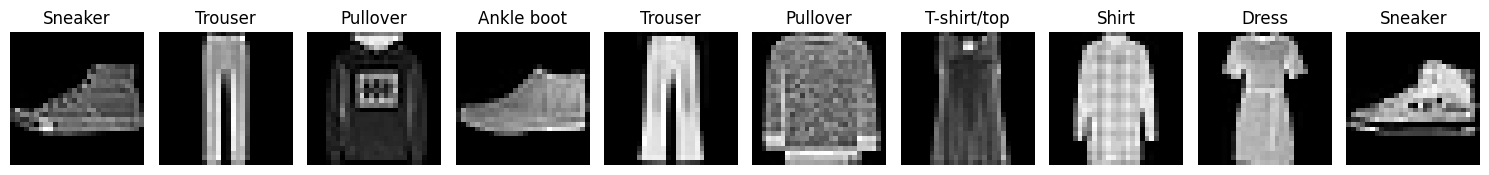


Within the training set: 6000 items were a T-shirt/top,
                         6000 items were a Trouser,
                         6000 items were a Pullover,
                         6000 items were a Dress,
                         6000 items were a Coat,
                         6000 items were a Sandal,
                         6000 items were a Shirt,
                         6000 items were a Sneaker,
                         6000 items were a Bag, and
                         6000 items were an Ankle boot

Within the testing set: 1000 items were a T-shirt/top,
                        1000 items were a Trouser,
                        1000 items were a Pullover,
                        1000 items were a Dress,
                        1000 items were a Coat,
                        1000 items were a Sandal,
                        1000 items were a Shirt,
                        1000 items were a Sneaker,
                        1000 items were a Bag, and
                      

In [36]:
'''
Display a random selection of images with their corresponding
labels

Then show how many images from the training and testing set
belong to each label
'''

all_images, all_labels = np.concatenate((train_images, test_images), axis=0), np.concatenate((train_labels, test_labels), axis=0)

random_images, random_labels = [], []
for _ in range(10):
    random_index = np.random.randint(0, 70000)
    random_images.append(all_images[random_index])
    random_labels.append(all_labels[random_index])

print('10 random images:')

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(random_images[i], cmap='gray')
    axes[i].set_title(class_names[random_labels[i]])
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

print()

label_count_train = np.bincount(train_labels)
label_count_test = np.bincount(test_labels)

print(f'''Within the training set: {label_count_train[0]} items were a T-shirt/top,
                         {label_count_train[1]} items were a Trouser,
                         {label_count_train[2]} items were a Pullover,
                         {label_count_train[3]} items were a Dress,
                         {label_count_train[4]} items were a Coat,
                         {label_count_train[5]} items were a Sandal,
                         {label_count_train[6]} items were a Shirt,
                         {label_count_train[7]} items were a Sneaker,
                         {label_count_train[8]} items were a Bag, and
                         {label_count_train[9]} items were an Ankle boot\n''')
print(f'''Within the testing set: {label_count_test[0]} items were a T-shirt/top,
                        {label_count_test[1]} items were a Trouser,
                        {label_count_test[2]} items were a Pullover,
                        {label_count_test[3]} items were a Dress,
                        {label_count_test[4]} items were a Coat,
                        {label_count_test[5]} items were a Sandal,
                        {label_count_test[6]} items were a Shirt,
                        {label_count_test[7]} items were a Sneaker,
                        {label_count_test[8]} items were a Bag, and
                        {label_count_test[9]} items were an Ankle boot\n''')
print('Both sets have uniform frequency for each fashion item: 0.1')

In [39]:
'''
Normalize the training and testing images to
conform to a Gaussian distribution with mean 0
and standard deviation of 1. Essentially mapping
every data point into its corresponding amount in
standard deviations

Then build a K-Nearest Neighbor classifier on
the normalized training data and use it to
classify 25 random normalized testing images
'''

train_mean, test_mean = np.mean(train_images), np.mean(test_images)
train_std, test_std = np.std(train_images), np.std(test_images)

train, test = (train_images - train_mean) / train_std, (test_images - test_mean) / test_std

random_test_images, random_test_labels = [], []
random_indices = []
for _ in range(25):
    random_index = np.random.randint(0, 10000)
    random_test_images.append(test[random_index])
    random_test_labels.append(test_labels[random_index])
    random_indices.append(random_index)

random_test_images, random_test_labels = np.array(random_test_images), np.array(random_test_labels)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train.reshape(60000, -1), train_labels)

test_predicted_labels = knn_classifier.predict(random_test_images.reshape(25, -1))

A = np.stack((random_test_labels, test_predicted_labels), axis=1)

for i in range(25):
    if A[i][0] == A[i][1]:
        print(f'Sample {random_indices[i]} - predicted output: {A[i][1]}, correct')
    else:
        print(f'Sample {random_indices[i]} - predicted output: {A[i][1]}, wrong: actual is {A[i][0]}')

Sample 8538 - predicted output: 0, wrong: actual is 6
Sample 3788 - predicted output: 7, correct
Sample 9199 - predicted output: 6, correct
Sample 5237 - predicted output: 5, correct
Sample 7042 - predicted output: 2, wrong: actual is 6
Sample 4472 - predicted output: 0, correct
Sample 6988 - predicted output: 5, correct
Sample 5617 - predicted output: 2, correct
Sample 2117 - predicted output: 2, correct
Sample 8595 - predicted output: 2, correct
Sample 6046 - predicted output: 1, correct
Sample 6830 - predicted output: 0, correct
Sample 4028 - predicted output: 4, correct
Sample 850 - predicted output: 8, correct
Sample 2909 - predicted output: 6, wrong: actual is 0
Sample 8737 - predicted output: 4, correct
Sample 6318 - predicted output: 2, correct
Sample 9690 - predicted output: 0, wrong: actual is 6
Sample 5928 - predicted output: 5, correct
Sample 2785 - predicted output: 0, correct
Sample 1409 - predicted output: 7, correct
Sample 8016 - predicted output: 7, correct
Sample 9636

In [40]:
'''
Implement metrics to gauge the overall accuracy of
the K-Nearest Neighbor classifier

The overall and per-class accuracy will be measured.
Per-class accuracy will also be represented by a
'confusion matrix' that shows the frequency of actual
and predicted class pairs

The confusion matrix should ideally be diagonal due
to matching actual and predicted classes
'''

def compute_accuracy(T, _):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the ratio of correct to
    total guesses
    '''

    total_correct = 0

    for actual, predicted in T:
        if actual == predicted:
            total_correct += 1

    return total_correct / len(T)

def compute_per_class_accuracy(T, n):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the ratio of correct to
    total guesses for each class
    '''

    frequency_counts, total_counts = [0 for _ in range(n)], [0 for _ in range(n)]

    for i, j in T:
        total_counts[i] += 1
        if i == j:
            frequency_counts[i] += 1

    return [freq / total if total != 0 else 0 for freq, total in zip(frequency_counts, total_counts)]

def compute_confusion_matrix(T, N):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the confusion matrix

    Every entry i, j in the matrix represents the
    frequency of actual class i and predicted
    class j
    '''

    confusion_matrix = [[0 for _ in range(N)] for _ in range(N)]

    for actual, predicted in T:
        confusion_matrix[actual][predicted] += 1

    return np.array(confusion_matrix)

accuracy: 0.55

Per class accuracy
0: 0.50
1: 0.60
2: 0.67
3: 0.50
4: 0.50

Confusion matrix
 0:  3  1  2  0  0
 1:  0  3  0  0  2
 2:  0  0  2  1  0
 3:  0  1  0  1  0
 4:  1  0  1  0  2


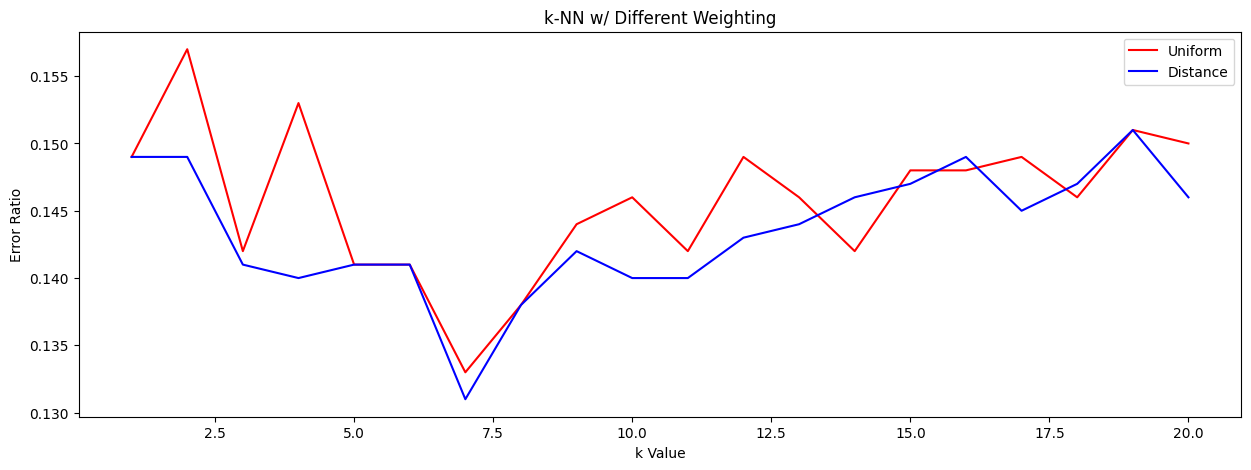

The first best parameter set with lowest error is a k-value of 7 and distance weighting, with error ratio 0.131


In [44]:
'''
Tune the hyperparameter 'k', the number of
nearest neighbors to compare a data point with,
and 'weights', the importance of nearby points
based on their distance

Data will be split between a training and
validation set. The validation set is a pseudo
testing set, in that it is used to iteratively
update hyperparameters of a model. The purpouse
is to achieve the best generalization

Here, the error ratio will be recorded and
graphed with different 'k' values and 'weights'
'''

rand_indices = np.random.choice(60000, size=1000, replace=False)
val_mask = np.zeros(60000, dtype=bool)
val_mask[rand_indices] = True

train_2, train_labels_2 = train[~val_mask], train_labels[~val_mask]
val, val_labels = train[val_mask], train_labels[val_mask]

E_u, E_d = [], []
for k in range(1, 21):
    knn_u, knn_d = KNeighborsClassifier(n_neighbors=k, weights='uniform'), KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_u.fit(train_2.reshape(59000, -1), train_labels_2)
    knn_d.fit(train_2.reshape(59000, -1), train_labels_2)

    pred_u_labels, pred_d_labels = knn_u.predict(val.reshape(1000, -1)), knn_d.predict(val.reshape(1000, -1))
    val_pred_u_labels, val_pred_d_labels = np.stack((val_labels, pred_u_labels), axis=1), np.stack((val_labels, pred_d_labels), axis=1)

    error_u, error_d = 1 - compute_accuracy(val_pred_u_labels, _), 1 - compute_accuracy(val_pred_d_labels, _)
    E_u.append(error_u)
    E_d.append(error_d)

k_range = np.linspace(1, 20, 20)

plt.figure(figsize=(15, 5))
plt.plot(k_range, E_u, color='red', label='Uniform')
plt.plot(k_range, E_d, color='blue', label='Distance')
plt.title('k-NN w/ Different Weighting')
plt.xlabel('k Value')
plt.ylabel('Error Ratio')

plt.legend()
plt.show()

best_k = [E_u.index(min(E_u)) + 1, min(E_u)]
best_weight = 'uniform'
lowest_error = best_k[1]

temp = [E_d.index(min(E_d)) + 1, min(E_d)]
if temp[1] < best_k[1]:
    best_k = temp[0]
    best_weight = 'distance'
    lowest_error = temp[1]
else:
    best_k = best_k[0]

print(f'The first best parameter set with lowest error is a k-value of {best_k} and {best_weight} weighting, with error ratio {lowest_error}')

In [45]:
'''
The K-Nearest Neighbor model with optimal hyperparameters
'k' and 'weights' will  be applied to the test and image data set

Metrics for the output will be displayed
'''

knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight)
knn.fit(train.reshape(60000, -1), train_labels)

test_labels_pred = knn.predict(test.reshape(10000, -1))

test_pairs = np.stack((test_labels_pred, test_labels), axis=1)

num_classes = 10

accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.4f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i} ({class_names[i]}): {acc:.4f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.8548

Per class accuracy
0 (T-shirt/top): 0.7933
1 (Trouser): 0.9928
2 (Pullover): 0.7433
3 (Dress): 0.9071
4 (Coat): 0.7837
5 (Sandal): 0.9963
6 (Shirt): 0.6330
7 (Sneaker): 0.8747
8 (Bag): 0.9724
9 (Ankle boot): 0.8844

Confusion matrix
 0: 848  7 19 31  1  1 162  0  0  0
 1:  0 967  2  4  0  0  0  0  1  0
 2: 17  6 802 13 109  0 122  0 10  0
 3: 17 12 10 869 24  0 22  0  4  0
 4:  5  4 84 38 768  0 74  0  7  0
 5:  0  0  0  0  0 807  0  2  0  1
 6: 105  3 83 43 95  5 607  0 17  1
 7:  1  0  0  0  0 103  0 956  7 26
 8:  7  1  0  2  3  1 13  0 952  0
 9:  0  0  0  0  0 83  0 42  2 972


From the given metrics, it seems that the easiest classes to recognize are Sandals, and the hardest are Shirts.

Shirts are also the easiest to confuse because the bulk of their errors come from predicting a Shirt as a T-shirt/top, which are very similar looking to Shirts.

What surprised me, were the results for the Sandals and Sneakers, another two similar looking items. Sandals had the highest accuracy, way more than the Sneakers. This means that the model can best tell if a shoe item is a Sandal compared to anything else.

The most important hyperparameter was 'k' for sure, since it dictated the trend of the error line. Output using different weighting was kind of similar to each other and not as significant.

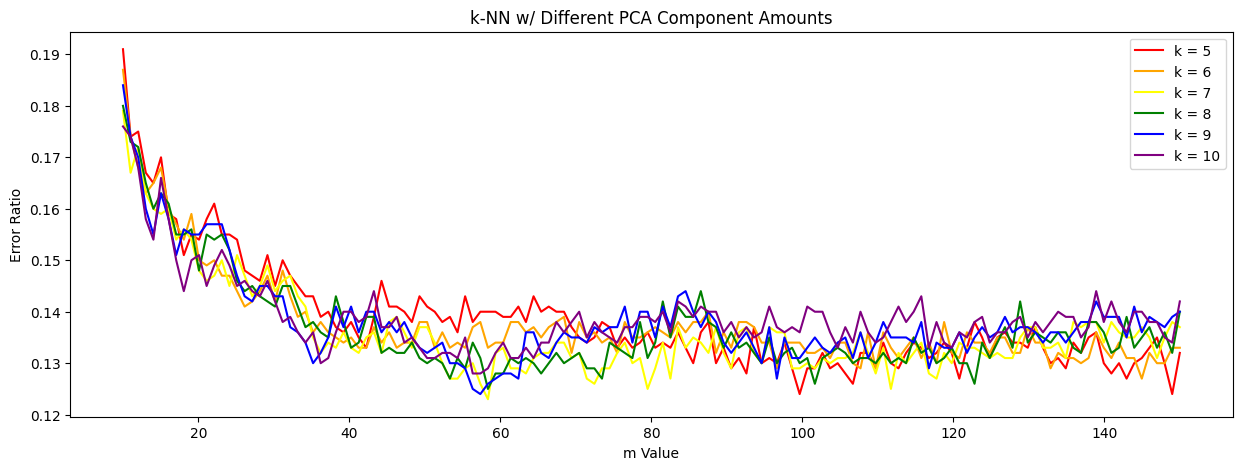

The first best parameter set with lowest error is a k-value of 7 and 58 components, with error ratio 0.123


In [47]:
'''
Six 'k' values: 5, 6, 7, 8, 9, and 10 will be used
with different values for 'm' in PCA. All K-NN models
will use the distance weighting since it is slightly
better than uniform weighting

Perform PCA (principal component analysis) on
the data before training it

PCA essentially reduces dimensionality in the data
and retains the most important variation information
via multiple 'principal components'

The key parameter here is 'm', which is the number
of principle components to consider
'''

E_5, E_6, E_7, E_8, E_9, E_10= [], [], [], [], [], []
best_m, best_k, lowest_error = 0, 0, float('inf')
for m in range(10, 150):
    pca = PCA(n_components=m)

    train_2_pca = pca.fit_transform(train_2.reshape(59000, -1))
    val_pca = pca.transform(val.reshape(1000, -1))

    knn_5, knn_6 = KNeighborsClassifier(n_neighbors=5, weights='distance'), KNeighborsClassifier(n_neighbors=6, weights='distance')
    knn_7, knn_8 = KNeighborsClassifier(n_neighbors=7, weights='distance'), KNeighborsClassifier(n_neighbors=8, weights='distance')
    knn_9, knn_10 = KNeighborsClassifier(n_neighbors=9, weights='distance'), KNeighborsClassifier(n_neighbors=10, weights='distance')

    knn_5.fit(train_2_pca, train_labels_2)
    knn_6.fit(train_2_pca, train_labels_2)
    knn_7.fit(train_2_pca, train_labels_2)
    knn_8.fit(train_2_pca, train_labels_2)
    knn_9.fit(train_2_pca, train_labels_2)
    knn_10.fit(train_2_pca, train_labels_2)

    pred_5, pred_6 = knn_5.predict(val_pca.reshape(1000, -1)), knn_6.predict(val_pca.reshape(1000, -1))
    pred_7, pred_8 = knn_7.predict(val_pca.reshape(1000, -1)), knn_8.predict(val_pca.reshape(1000, -1))
    pred_9, pred_10 = knn_9.predict(val_pca.reshape(1000, -1)), knn_10.predict(val_pca.reshape(1000, -1))

    val_pred_5, val_pred_6 = np.stack((val_labels, pred_5), axis=1), np.stack((val_labels, pred_6), axis=1)
    val_pred_7, val_pred_8 = np.stack((val_labels, pred_7), axis=1), np.stack((val_labels, pred_8), axis=1)
    val_pred_9, val_pred_10 = np.stack((val_labels, pred_9), axis=1), np.stack((val_labels, pred_10), axis=1)

    error_5, error_6 = 1 - compute_accuracy(val_pred_5, _), 1 - compute_accuracy(val_pred_6, _)
    error_7, error_8 = 1 - compute_accuracy(val_pred_7, _), 1 - compute_accuracy(val_pred_8, _)
    error_9, error_10 = 1 - compute_accuracy(val_pred_9, _), 1 - compute_accuracy(val_pred_10, _)
    E_5.append(error_5)
    E_6.append(error_6)
    E_7.append(error_7)
    E_8.append(error_8)
    E_9.append(error_9)
    E_10.append(error_10)

    if error_5 < lowest_error:
        best_m = m
        best_k = 5
        lowest_error = error_5
    if error_6 < lowest_error:
        best_m = m
        best_k = 6
        lowest_error = error_6
    if error_7 < lowest_error:
        best_m = m
        best_k = 7
        lowest_error = error_7
    if error_8 < lowest_error:
        best_m = m
        best_k = 8
        lowest_error = error_8
    if error_9 < lowest_error:
        best_m = m
        best_k = 9
        lowest_error = error_9
    if error_10 < lowest_error:
        best_m = m
        best_k = 10
        lowest_error = error_10

m_range = np.linspace(10, 150, 140)

plt.figure(figsize=(15, 5))
plt.plot(m_range, E_5, color='red', label='k = 5')
plt.plot(m_range, E_6, color='orange', label='k = 6')
plt.plot(m_range, E_7, color='yellow', label='k = 7')
plt.plot(m_range, E_8, color='green', label='k = 8')
plt.plot(m_range, E_9, color='blue', label='k = 9')
plt.plot(m_range, E_10, color='purple', label='k = 10')
plt.title('k-NN w/ Different PCA Component Amounts')
plt.xlabel('m Value')
plt.ylabel('Error Ratio')

plt.legend()
plt.show()

print(f'The first best parameter set with lowest error is a k-value of {best_k} and {best_m} components, with error ratio {lowest_error}')

In [49]:
'''
The K-Nearest Neighbor model with PCA transformed data and
optimal hyperparamters 'm' and 'k' will  be applied to the
test and image data set

Metrics for the output will be displayed
'''

pca = PCA(n_components=best_m)
train_pca = pca.fit_transform(train.reshape(60000, -1))
test_pca = pca.transform(test.reshape(10000, -1))

knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(train_pca, train_labels)

test_labels_pred = knn.predict(test_pca)

test_pairs = np.stack((test_labels_pred, test_labels), axis=1)

num_classes = 10

accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.4f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i} ({class_names[i]}): {acc:.4f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.8611

Per class accuracy
0 (T-shirt/top): 0.7906
1 (Trouser): 0.9918
2 (Pullover): 0.7645
3 (Dress): 0.8997
4 (Coat): 0.7624
5 (Sandal): 0.9835
6 (Shirt): 0.6450
7 (Sneaker): 0.9011
8 (Bag): 0.9592
9 (Ankle boot): 0.9205

Confusion matrix
 0: 823  6 19 31  2  0 159  0  1  0
 1:  0 964  2  6  0  0  0  0  0  0
 2: 16  2 776 13 98  0 102  0  8  0
 3: 19 18 12 879 24  0 20  0  5  0
 4:  7  5 102 38 786  0 89  0  4  0
 5:  1  0  0  0  0 895  0 10  1  3
 6: 125  4 85 29 85  0 614  0 10  0
 7:  1  0  0  0  0 63  0 948  5 35
 8:  8  1  4  4  5  2 16  0 965  1
 9:  0  0  0  0  0 40  0 42  1 961


Conducting a PCA transformation on the data, with m-value 58 and k-value 7, resulted in a 0.63% increase in overall training accuracy. The total time taken to train and predict w/out PCA took 7.4s, whereas w/ PCA took 3.9s.